# US Honey production case study 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('US_honey.csv')
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [14]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [15]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [17]:
df.shape

(1115, 8)

In [19]:
df.dtypes      #dtypes that is used to get the datatype of each column

state                   object
colonies_number          int64
yield_per_colony         int64
production               int64
stocks                   int64
average_price          float64
value_of_production      int64
year                     int64
dtype: object

In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

- mode()= object 
- mean()= int/float

In [25]:
df.duplicated().sum()

0

In [26]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

1) Which states are rarely contributing to honey production for the last 27 years?

In [28]:
df['state'].unique()  # unique() = distinct value/ data that are present in a column

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [29]:
df['state'].nunique()  #no of unique state

44

In [36]:
df['production'].groupby(df['state']).sum().sort_values().reset_index()

,state,production
0,Maryland,1975000
1,Oklahoma,2055000
2,SouthCarolina,2823000
3,Kentucky,3224000
4,Maine,4762000
5,Virginia,5153000
6,WestVirginia,6411000
7,Tennessee,6857000
8,NewJersey,6913000
9,Vermont,7032000


In [38]:
x = df.state.value_counts()

In [39]:
x.values

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 26, 18, 15, 12,  9,  9], dtype=int64)

In [40]:
x.index

Index(['Alabama', 'Missouri', 'Arizona', 'NewJersey', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'SouthDakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Montana', 'Nebraska',
       'Mississippi', 'Minnesota', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Louisiana', 'Maine', 'Michigan', 'Wyoming', 'Kentucky',
       'NewMexico', 'Nevada', 'SouthCarolina', 'Oklahoma', 'Maryland'],
      dtype='object')

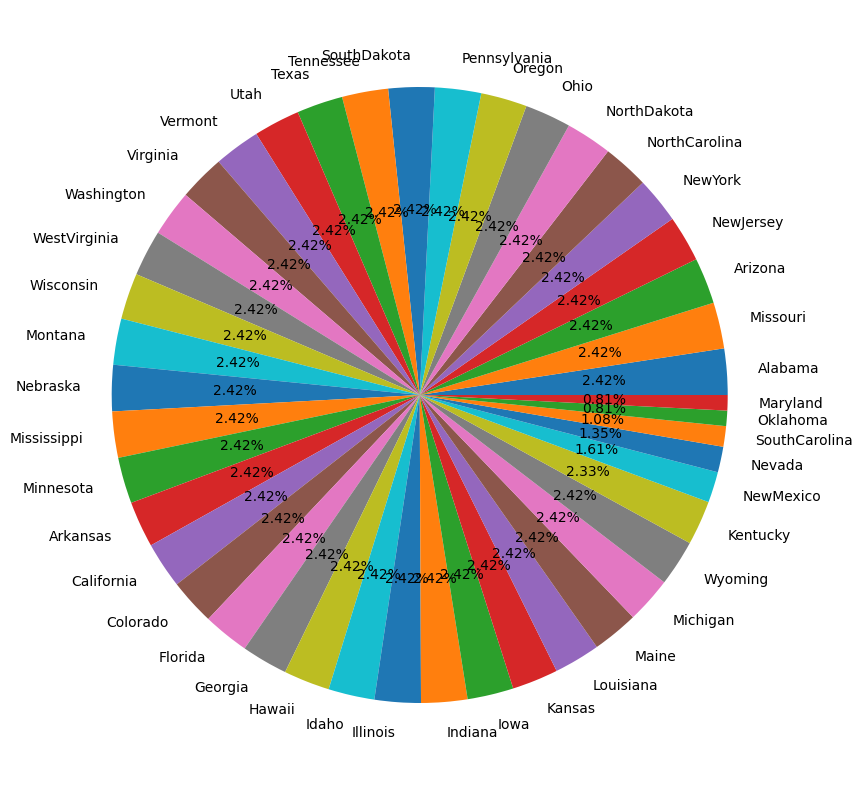

In [44]:
plt.figure(figsize=(10,10))
plt.pie(x.values, labels = x.index, autopct = '%0.2f%%')
plt.show()

conclusion:less contributing in honey production
- Oklahoma          
- Maryland 

2) Which are the top 5 Honey producing states in the US ?

In [60]:
df.groupby('state')['production'].sum().sort_values(ascending = False).reset_index().head(5)

,state,production
0,NorthDakota,513742000
1,California,423876000
2,SouthDakota,355726000
3,Florida,280934000
4,Montana,197173000


**or**

In [52]:
new_df=df.groupby("state").sum()["production"].reset_index()

In [53]:
new_df1=new_df.sort_values(by="production",ascending=False)

In [54]:
new_df1.head(5)

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


3) What is the Change in mean Average price of Honey from 1995 to 2021?

In [61]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [68]:
df1 = df.average_price.groupby(df['year']).mean().reset_index()
df1

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


In [66]:
df.average_price.groupby(df['year']==1995).mean().reset_index()

,year,average_price
0,False,143.325612
1,True,74.840909


In [67]:
df.average_price.groupby(df['year']==2021).mean().reset_index()

,year,average_price
0,False,145.731498
1,True,3.334250


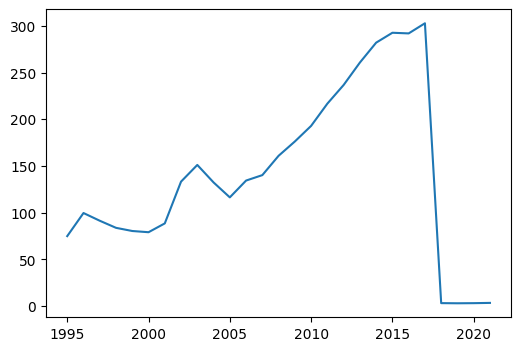

In [71]:
plt.figure(figsize=(6, 4))
plt.plot(df1['year'],df1['average_price'])
plt.show()

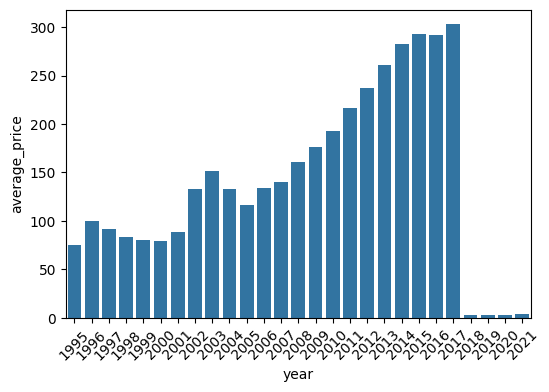

In [89]:
plt.figure(figsize=(6,4))
sns.barplot(data = df1, x = 'year', y = 'average_price')
plt.xticks(rotation=45)
plt.show()

- conclusion

2017 the price was most

2018-2021 minimum price


4) Which was the year when production of Honey in wholeUS was the highest?

In [86]:
new_df=df.groupby("year")["production"].sum().reset_index()
new_df

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


In [84]:
df.groupby("year")["production"].sum().sort_values(ascending = False).reset_index().head(2)

,year,production
0,2000,220320000
1,1998,219321000


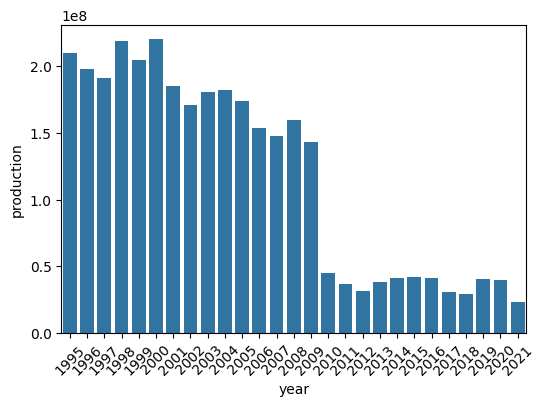

In [91]:
plt.figure(figsize=(6,4))
sns.barplot(data = new_df, x = 'year', y = 'production')
plt.xticks(rotation = 45)
plt.show()

- conclusion: 
1998
2000 honey production was more

5) From the above inference we get the production was highest in the year 2000, now let
infer which state was having highest contribution in that year

In [102]:
df['production'].groupby([df['state'],df['year']==2000]).sum().sort_values(ascending = False).reset_index()

,state,year,production
0,NorthDakota,False,480392000
1,California,False,393076000
2,SouthDakota,False,327291000
3,Florida,False,256574000
4,Montana,False,184445000
...,...,...,...
82,Virginia,True,294000
83,Maryland,True,276000
84,Oklahoma,True,245000
85,Maine,True,231000


In [92]:
df2 = df[df['year']==2000]
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
223,Georgia,55000,57,3135000,376000,63.0,1975000,2000
224,Hawaii,7000,112,784000,125000,81.0,635000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
226,Illinois,8000,61,488000,146000,117.0,571000,2000


In [104]:
df1=df[['state','production']].sort_values(by="production",ascending=False)
df1

,state,production
3,California,39060000
134,California,37350000
581,NorthDakota,35100000
622,NorthDakota,34650000
458,NorthDakota,33670000
...,...,...
769,Kentucky,17000
984,SouthCarolina,15000
955,Alabama,14000
835,Alabama,13000


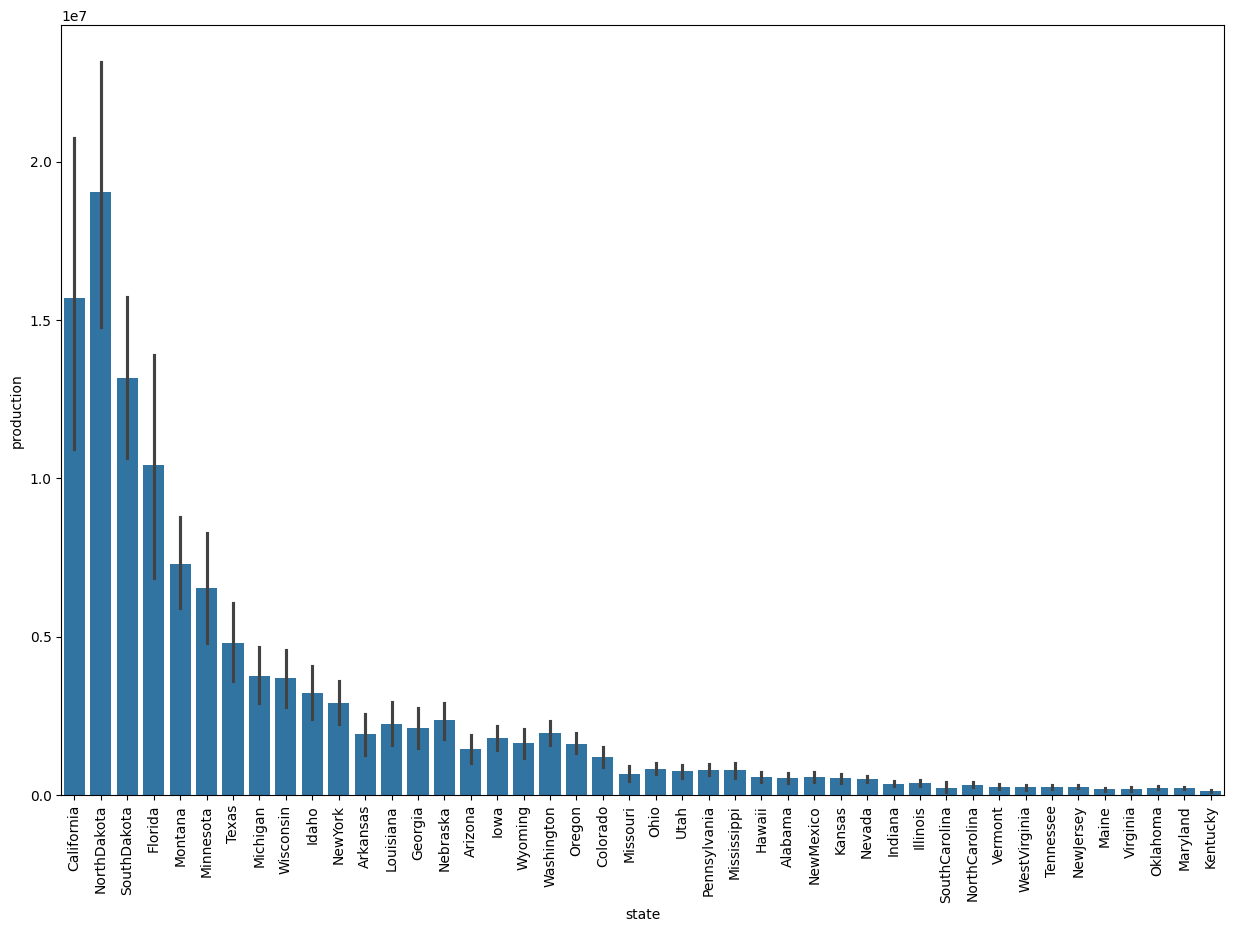

In [105]:
plt.figure(figsize=(15,10))
sns.barplot(data=df1,x='state',y='production')
plt.xticks(rotation=90)
plt.show()

northDakota is having more production in year 2000

6) Which states have the highest no. of colonies in the year 2000?

In [106]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [110]:
a = df.colonies_number.groupby([df.state, df.year == 2000]).sum().reset_index()
a

,state,year,colonies_number
0,Alabama,False,272000
1,Alabama,True,16000
2,Arizona,False,814000
3,Arizona,True,40000
4,Arkansas,False,853000
...,...,...,...
82,WestVirginia,True,7000
83,Wisconsin,False,1614000
84,Wisconsin,True,84000
85,Wyoming,False,1026000


In [113]:
a.sort_values(by = 'colonies_number', ascending = False)

,state,year,colonies_number
56,NorthDakota,False,10420000
6,California,False,9695000
67,SouthDakota,False,6404000
10,Florida,False,5296000
42,Montana,False,3577000
...,...,...,...
78,Virginia,True,7000
82,WestVirginia,True,7000
61,Oklahoma,True,7000
33,Maryland,True,6000


In [114]:
df2=df[['state','colonies_number']].sort_values(by="colonies_number",ascending=False)

In [115]:
df2

,state,colonies_number
980,NorthDakota,550000
1020,NorthDakota,520000
1100,NorthDakota,515000
662,NorthDakota,510000
177,California,505000
...,...,...
789,Vermont,3000
377,Oklahoma,3000
319,Maryland,3000
101,Kentucky,3000


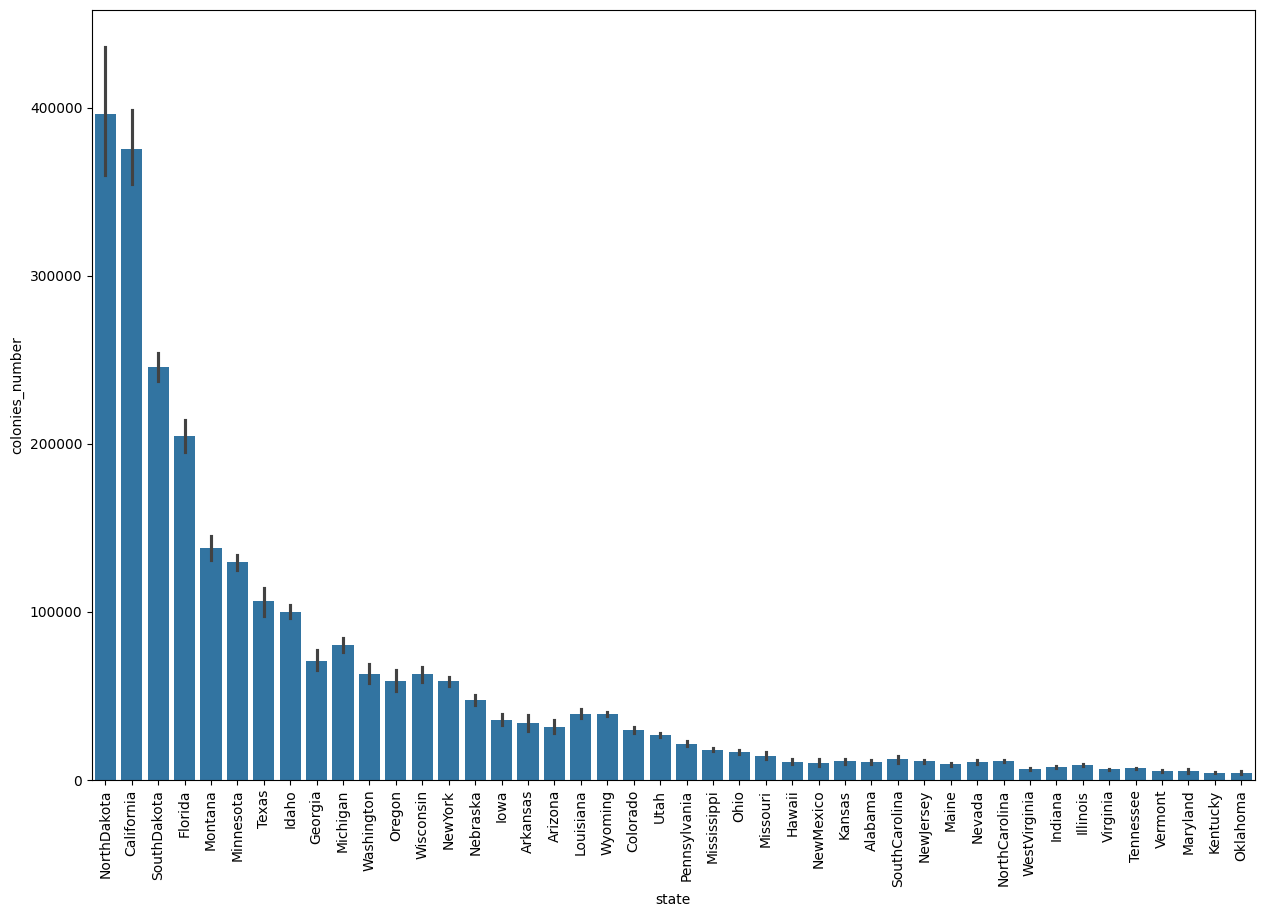

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(data=df2,x='state',y='colonies_number')
plt.xticks(rotation=90)
plt.show()